In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

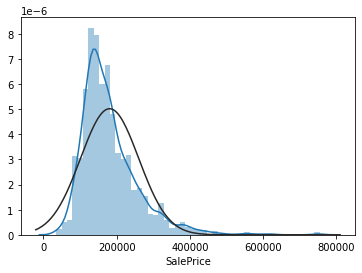

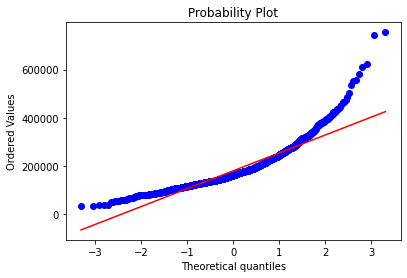

In [4]:
sns.distplot(train['SalePrice'],fit=norm)

fig=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

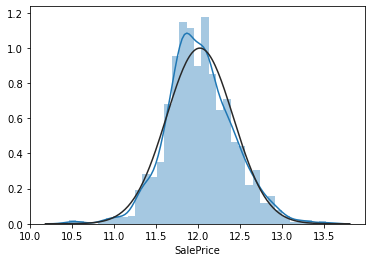

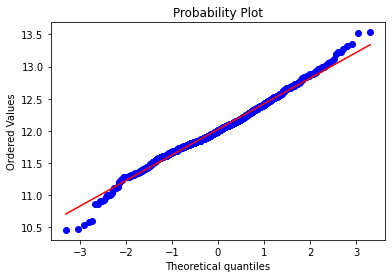

In [5]:
train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
fig=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

In [6]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<13)].index)
train.shape

(1458, 80)

In [7]:
y=train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)


In [8]:
train.shape
#test.shape
df=pd.concat((train,test)).reset_index(drop=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         2908
MiscFeature    2812
Alley          2719
Fence          2346
FireplaceQu    1420
               ... 
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
MSSubClass        0
Length: 79, dtype: int64

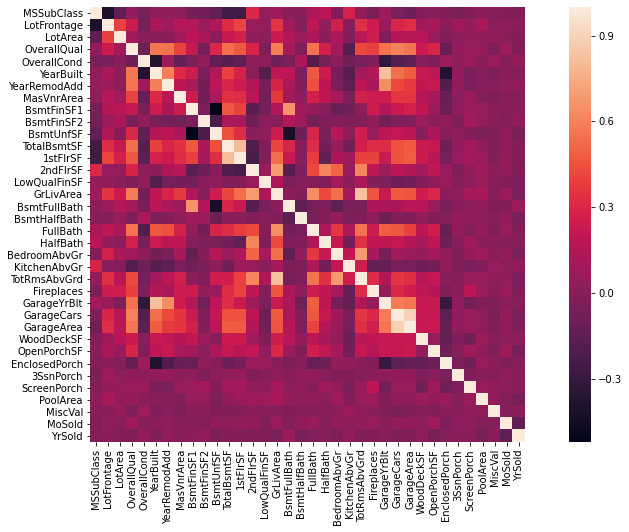

In [10]:
mat=train.corr()
f,ax=plt.subplots(figsize=(16,8))
hm=sns.heatmap(mat,square=True,vmax=1)

In [11]:
df_na=(df.isnull().sum()/len(df)).sort_values(ascending=False)
df_na=df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)


In [12]:
miss=pd.DataFrame({'Percent':df_na})*100
miss[:80]

,Percent
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageQual,5.450806
GarageYrBlt,5.450806
GarageFinish,5.450806


In [13]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [14]:
df['FireplaceQu'].value_counts()
df['FireplaceQu']=df['FireplaceQu'].fillna('None')

In [15]:
df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
df['LotFrontage'].isnull().sum()

0

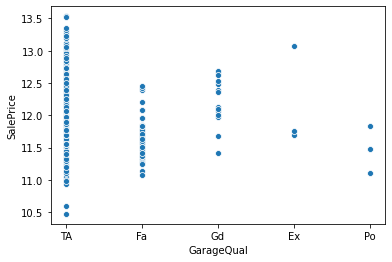

In [16]:
sns.scatterplot(x=train['GarageQual'],y=y)

In [17]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageQual'].isnull().sum()

0

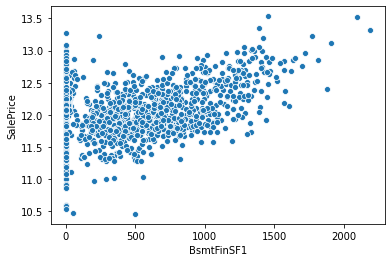

In [18]:
sns.scatterplot(x=train['BsmtFinSF1'],y=y)

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageCond']:
        df[col] = df[col].fillna('None')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
       df[col] = df[col].fillna('None')

In [20]:
df_na=(df.isnull().sum()/len(df)).sort_values(ascending=False)
df_na=df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)
miss=pd.DataFrame({'Percent':df_na})*100
miss

,Percent
MasVnrType,0.822763
MasVnrArea,0.788481
MSZoning,0.137127
Functional,0.068564
Utilities,0.068564
Exterior2nd,0.034282
Electrical,0.034282
Exterior1st,0.034282
KitchenQual,0.034282
SaleType,0.034282


In [21]:
df['Electrical']=df['Electrical'].fillna('SBrkr')
df['KitchenAbvGr']=df['KitchenAbvGr'].fillna(df['KitchenAbvGr'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Functional'].fillna('Typ',inplace=True)
df.drop(['Utilities'],axis=1,inplace=True)
df['SaleType'].fillna('WD',inplace=True)


In [22]:
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

In [23]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [24]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,7,2006,WD,Normal


In [25]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['OverallQual'] = df['OverallQual'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [26]:
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))


In [27]:
#df.info()
numeric=df.dtypes[df.dtypes!="object"].index
numeric

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'TotalSF', 'Total_Bathrooms'],
      dtype='object')

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

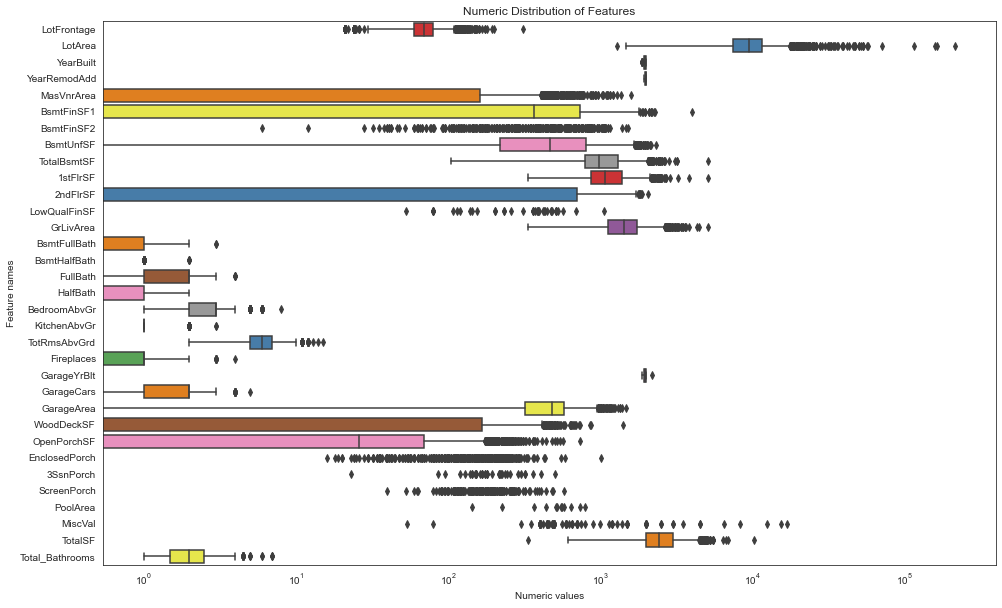

In [28]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(16, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=df[numeric] , orient="h", palette="Set1")
#ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")

In [29]:
from scipy.special import boxcox1p
skewed=df[numeric].apply(lambda x:x.skew()).sort_values(ascending=False)
skewed=skewed>0.75
ftr=skewed.index
for i in ftr:
    df[i]=boxcox1p(df[i],0.15)
    

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

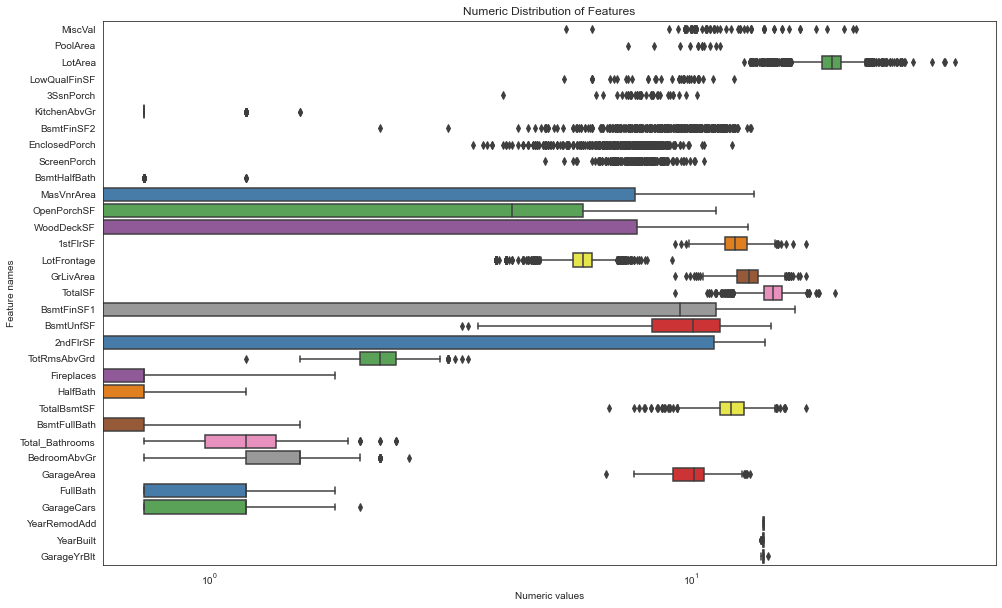

In [30]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(16, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=df[ftr] , orient="h", palette="Set1")
#ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")

In [31]:
#create new features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       2917 non-null   object 
 1   MSZoning         2917 non-null   object 
 2   LotFrontage      2917 non-null   float64
 3   LotArea          2917 non-null   float64
 4   Street           2917 non-null   object 
 5   LotShape         2917 non-null   object 
 6   LandContour      2917 non-null   object 
 7   LotConfig        2917 non-null   object 
 8   LandSlope        2917 non-null   object 
 9   Neighborhood     2917 non-null   object 
 10  Condition1       2917 non-null   object 
 11  Condition2       2917 non-null   object 
 12  BldgType         2917 non-null   object 
 13  HouseStyle       2917 non-null   object 
 14  OverallQual      2917 non-null   object 
 15  OverallCond      2917 non-null   object 
 16  YearBuilt        2917 non-null   float64
 17  YearRemodAdd  

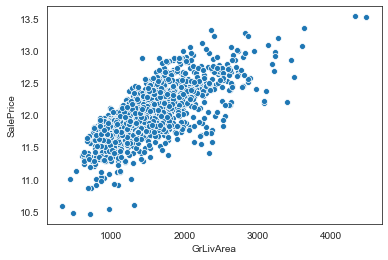

In [32]:
sns.scatterplot(x=train['GrLivArea'],y=y)

In [33]:
train.shape[0]+test.shape[0]
df.shape

(2917, 76)

In [34]:
df=pd.get_dummies(df).reset_index(drop=True)


In [48]:
from sklearn.linear_model import LassoCV,Ridge,RidgeCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from sklearn.svm import SVR


In [36]:
xtrain=df.iloc[:len(y),:]
xtest=df.iloc[len(y):,:]
xtest.shape

(1459, 330)

In [37]:
k=KFold(n_splits=10,shuffle=True,random_state=66)
def rmslv(model,X):
    score=np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=k))
    return score

    

In [52]:
from lightgbm import LGBMRegressor
lgbm =LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
xgb=XGBRegressor(learning_rate=0.01,
                       n_estimators=3500,
                       max_depth=4,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [39]:
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas,cv=k))
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
gbr=GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


In [42]:
score=rmslv(lgbm,xtrain)
score.mean()

0.11834629138009205

In [43]:
score=rmslv(xgb,xtrain)
score.mean()

[10:30:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:35:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

0.14038952656861178

In [44]:
score=rmslv(svr,xtrain)
score.mean()

0.1117104689219699

In [45]:
score=rmslv(ridge,xtrain)
score.mean()

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20794e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61543e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35062e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37885e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27896e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17184e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45191e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21497e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37561e-

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.242e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75475e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33008e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.47171e-17

0.11160034556335093

In [46]:
score=rmslv(gbr,xtrain)
score.mean()

0.11383279143568166

In [47]:
score=rmslv(rf,xtrain)
score.mean()

0.1423073899989176

In [49]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=k, l1_ratio=e_l1ratio))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=k))

In [50]:
score=rmslv(lasso,xtrain)
score.mean()


0.10960703915518308

In [51]:
score=rmslv(elasticnet,xtrain)
score.mean()

0.10950430783731765

In [ ]:
lasso_model=lasso.fit(xtrain,y)
elastic_model=elasticnet.fit(xtrain,y)
ridge_model=ridge.fit(xtrain,y)
gbr_model=gbr.fit(xtrain,y)
xgb_model=xgb.fit(xtrain,y)
svr_model=svr.fit(xtrain,y)
rf_model=rf.fit(xtrain,y)
lgb_model=lgbm.fit(xtrain,y)

In [ ]:
from mlxtend.regressor import StackingCVRegressor
stack_m=StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True)
stack_model=stack_m.fit(np.array(xtrain),y)

In [60]:
y_pred=stack_model.predict(np.array(xtrain))
score=np.sqrt(mean_squared_error(y,y_pred))
score

0.08447463229002883

In [74]:
def predictions(X):
   return ((0.1 * ridge_model.predict(X)) + \
            (0.2 * svr_model.predict(X)) + \
            (0.1 * gbr_model.predict(X)) + \
            (0.1 * lasso_model.predict(X)) + \
            (0.1 * lgb_model.predict(X)) + \
            (0.05 *rf_model.predict(X)) + \
            (0.35 * stack_model.predict(np.array(X))))
score=np.sqrt(mean_squared_error(y,predictions(xtrain)))
score

0.07815570867318905

In [76]:

submission=pd.read_csv('sample_submission.csv')
submission.shape

(1459, 2)

In [84]:
submission.iloc[:,1]=np.floor(np.expm1(predictions(xtest)))
sub=submission['SalePrice'].sort_values()
sub.head()

362     50490.0
1431    51252.0
1428    58423.0
359     58485.0
1433    58905.0
Name: SalePrice, dtype: float64

In [85]:
q1=submission['SalePrice'].quantile(0.0045)
q2=submission['SalePrice'].quantile(0.99)
submission['SalePrice']=submission['SalePrice'].apply(lambda x:x if x>q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
sub=submission['SalePrice'].sort_values()
sub.head()

362     38877.30
1431    39464.04
1428    44985.71
359     45033.45
1433    45356.85
Name: SalePrice, dtype: float64

In [86]:
submission.to_csv('my_submit.csv',index=False)

In [87]:
submission['SalePrice'] *= 1.001619
submission.to_csv("my_submit2.csv", index=False)

In [88]:
from mlxtend.regressor import StackingCVRegressor
stack_m1=StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgb, lgbm,svr),
                                meta_regressor=svr,
                                use_features_in_secondary=True)
stack_model1=stack_m1.fit(np.array(xtrain),y)

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46279e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28401e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46485e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50257e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41792e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.02625e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23485e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57004e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72219e-

[11:54:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97818e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95976e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95114e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97262e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99684e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_m

[11:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
y_pred=stack_model1.predict(np.array(xtrain))
score=np.sqrt(mean_squared_error(y,y_pred))
score

0.07938767961750398

In [145]:
def predictions1(X):
   return ((0.1 * ridge_model.predict(X)) + \
            (0.1 * svr_model.predict(X)) + \
            (0.1 * gbr_model.predict(X)) + \
            (0.1 * lasso_model.predict(X)) + \
            (0.2 * lgb_model.predict(X)) + \
            (0.05 *xgb_model.predict(X)) + \
            (0.35 * stack_model1.predict(np.array(X))))
score=np.sqrt(mean_squared_error(y,predictions1(xtrain)))
score

0.07376065629439701

In [146]:
submission=pd.read_csv('sample_submission.csv')
submission.iloc[:,1]=np.floor(np.expm1(predictions1(xtest)))
sub=submission['SalePrice'].sort_values()
sub.head()

362     48078.0
1431    49718.0
1428    56206.0
1411    58528.0
354     60415.0
Name: SalePrice, dtype: float64

In [147]:
q1=submission['SalePrice'].quantile(0.0045)
q2=submission['SalePrice'].quantile(0.99)
submission['SalePrice']=submission['SalePrice'].apply(lambda x:x if x>q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
sub=submission['SalePrice'].sort_values()
sub.head()

362     37020.06
1431    38282.86
1428    43278.62
1411    45066.56
354     46519.55
Name: SalePrice, dtype: float64

In [150]:
score=np.sqrt(mean_squared_error(y,predictions1(xtrain)))
score

0.07376065629439701

In [151]:
submission.to_csv('my_submit4.csv',index=False)
